In [1]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [2]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [43]:
df25 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_aug_sept_past2022_35_completed_qm.csv", parse_dates_col=[4,5,6])
#df25 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_aug_sept_past2022_25_completed_qm.csv", parse_dates_col=[4,5,6])

In [4]:
df25

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,10056839,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:34,2022-08-01 00:04:46,2022-08-01 00:43:43,48,1,120,...,0,0,0,0,0,0,0,0,0,0
1,10056840,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:35,2022-08-01 00:04:47,2022-08-01 00:43:20,48,1,120,...,0,0,0,0,0,0,0,0,0,0
2,10056841,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:35,2022-08-01 00:04:47,2022-08-01 00:48:53,48,1,120,...,0,0,0,0,0,0,0,0,0,0
3,10056842,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:36,2022-08-01 00:04:47,2022-08-01 00:46:10,48,1,120,...,0,0,0,0,0,0,0,0,0,0
4,10056843,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:37,2022-08-01 00:04:47,2022-08-01 00:42:33,48,1,120,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,10202512,350d51d0ac5acfacc4539962a6f1f3e3516dcc7f6d0bee...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-08-31 23:57:02,2022-08-31 23:59:33,2022-09-01 00:02:51,720,16,20,...,0,0,0,0,0,0,0,0,0,0
69797,10202513,350d51d0ac5acfacc4539962a6f1f3e3516dcc7f6d0bee...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-08-31 23:57:02,2022-08-31 23:59:38,2022-09-01 00:02:53,720,16,20,...,0,0,0,0,0,0,0,0,0,0
69798,10202514,350d51d0ac5acfacc4539962a6f1f3e3516dcc7f6d0bee...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-08-31 23:57:05,2022-08-31 23:59:38,2022-09-01 00:02:53,720,16,20,...,0,0,0,0,0,0,0,0,0,0
69799,10202515,350d51d0ac5acfacc4539962a6f1f3e3516dcc7f6d0bee...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-08-31 23:57:06,2022-08-31 23:59:42,2022-09-01 00:03:00,720,16,20,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df25 = build_features.remove_default_cols(df25)

In [44]:
df25 = build_features.slice_df(df25,1000,69801)

In [7]:
X_historydata25=build_features.remove_specific_col(df25,'queue_minutes')
Y_waittimedata=df25['queue_minutes']

In [8]:
Y_waittimedata

1000       4
1001     182
1002       0
1003       0
1004       0
        ... 
69796      2
69797      2
69798      2
69799      2
69800      0
Name: queue_minutes, Length: 68801, dtype: int64

In [9]:
X_historydata25

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,qm2,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,48,1,120,884475,429,22918,9692906,52,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,52,4,600,882315,411,22918,9692906,507,1,3,...,0,0,0,0,0,0,0,0,0,0
1002,48,1,120,882075,405,22918,9692906,53,4,4,...,3,0,0,0,0,0,0,0,0,0
1003,48,1,120,882195,406,22918,9692906,60,4,4,...,3,0,0,0,0,0,0,0,0,0
1004,48,1,120,882315,407,22918,9692906,30,4,4,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,20560,12,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,20580,13,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,20600,14,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,20620,15,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_historydata_test25 = build_features.remove_specific_col(X_historydata25,'run_minutes')
X_historydata_test25

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,48,1,120,884475,429,22918,9692906,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,52,4,600,882315,411,22918,9692906,1,3,3,...,0,0,0,0,0,0,0,0,0,0
1002,48,1,120,882075,405,22918,9692906,4,4,4,...,3,0,0,0,0,0,0,0,0,0
1003,48,1,120,882195,406,22918,9692906,4,4,4,...,3,0,0,0,0,0,0,0,0,0
1004,48,1,120,882315,407,22918,9692906,4,4,4,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,20560,12,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,20580,13,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,20600,14,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,20620,15,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import joblib
my_scaler = joblib.load('35_lookback_scaler.gz')

In [13]:
from importlib import reload
from tensorflow.keras.models import load_model

In [14]:
model = load_model("../models/35lookback_corrected_qm_model.h5")

In [15]:
y_pred25_sept = predict_model.predict_and_compare(model,my_scaler, X_historydata_test25, Y_waittimedata)

 106/2151 [>.............................] - ETA: 0s  

2023-10-02 18:08:37.481219: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 11558568 exceeds 10% of free system memory.


2151/2151 [==============================] - 1s 402us/step
y_pred shape : (68801, 1)
--- inspecting prediction values --- 
number of negative numbers  :19955
number of zeros in the data : 0
number of positive numbers  :48846

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 34809
number of positive numbers  :33992

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 19955
number of positive numbers  :48846



In [16]:
#print(X_historydata_test_rm)
run_mins = X_historydata25["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata_test25["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))

run_minutes[ 52 507  53 ...   3   3   2]
 nnodes : [ 1  4  1 ... 16 16  1]


In [17]:
analyze_pred.analysis_pred_vs_orig(2000,200, Y_waittimedata, y_pred25_sept.ravel(), nnodes,run_mins,
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    194
1      6
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    200
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 6-0=6

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    197
1      3
Name: count, dtype: int64


In [30]:
reload(analyze_pred)
from sklearn.metrics import r2_score,mean_absolute_error
import pandas as pd
provision_times=[20,45,60,90]
rdf=pd.DataFrame()
for provision_time in provision_times:
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    maes = []
    tolerance_factor=3
    r2_scores=[]
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(0,68801, Y_waittimedata, y_pred25_sept.ravel(), nnodes,run_mins,
                                                                                                               provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s=r2_score(Y_waittimedata.to_numpy(),y_pred25_sept)
    r2_scores.append(r2s)     
    maes.append(mean_absolute_error(Y_waittimedata.to_numpy(),y_pred25_sept))
    
    if provision_time == 20:
        rdf = analyze_pred.append_to_df(rdf,35,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
    else:
        rdf =  analyze_pred.append_to_df(rdf,35,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
     

In [31]:
rdf

,past_k,provision_time,num_scheduled,num_missed,not_missed,wrongly_scheduled,total_num,r2_score,mae
0,35,[20],[11585],[2985],[8600],[3201],[68801],[-4.951902496903082],[409.600420972365]
1,35,[45],[8928],[2774],[6154],[1963],[68801],[-4.951902496903082],[409.600420972365]
2,35,[60],[8166],[2468],[5698],[1888],[68801],[-4.951902496903082],[409.600420972365]
3,35,[90],[7182],[1968],[5214],[1815],[68801],[-4.951902496903082],[409.600420972365]


In [32]:
reload(analyze_pred)
rdf = analyze_pred.add_to_df(35,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
print(rdf.to_string())

   past_k  provision_time  num_scheduled  num_missed  not_missed  wrongly_scheduled  total_num  r2_score         mae
0      35              90           7182        1968        5214               1815      68801 -4.951902  409.600421


In [33]:
analyze_pred.analysis_pred_vs_orig(0,68801,Y_waittimedata, y_pred25_sept.ravel(), nnodes,run_mins,
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    57216
1    11585
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    65816
m     2985
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 11585-2985=8600

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    65600
1     3201
Name: count, dtype: int64


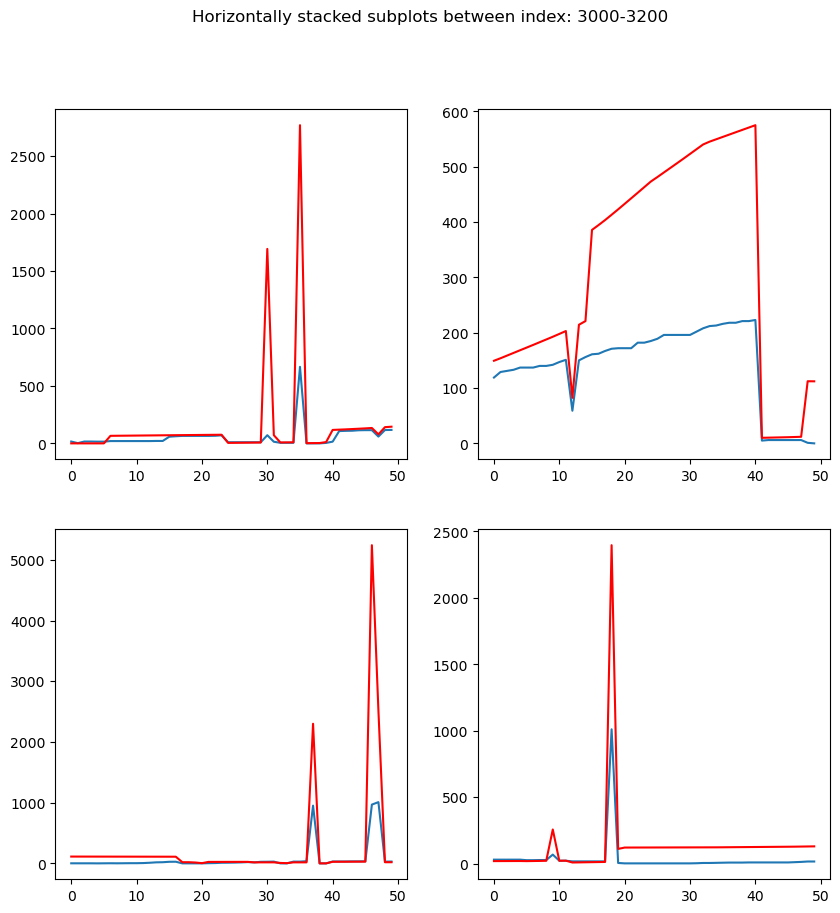

In [34]:
analyze_pred.plot_pred_vs_orig(3000,50,Y_waittimedata,y_pred25_sept.ravel())

In [38]:
Y_waittimedata[5000:5050]

6000      0
6001      0
6002      0
6003      0
6004      0
6005      1
6006    401
6007      0
6008      0
6009      0
6010      0
6011      1
6012      1
6013      1
6014      1
6015      1
6016      4
6017      0
6018      2
6019      4
6020      4
6021      4
6022      4
6023      4
6024      4
6025      7
6026      1
6027      3
6028      2
6029      2
6030     31
6031      0
6032      0
6033      0
6034      0
6035      0
6036      0
6037      5
6038      0
6039      0
6040    528
6041      0
6042      0
6043      0
6044      0
6045    331
6046      2
6047     54
6048     79
6049     82
Name: queue_minutes, dtype: int64

In [47]:
df25[5050:5100]

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
6050,128,4,120,95,298459,193,22918,9692906,79,0,...,0,4,1,1,1,1,1,0,0,0
6051,48,1,120,0,298459,193,22918,9692906,32,2,...,2,0,4,1,1,1,1,1,0,0
6052,48,1,120,0,298579,194,22918,9692906,60,2,...,2,0,4,1,1,1,1,1,0,0
6053,48,1,120,0,298699,195,22918,9692906,27,2,...,2,0,4,1,1,1,1,1,0,0
6054,48,1,120,0,298819,196,22918,9692906,28,2,...,2,0,4,1,1,1,1,1,0,0
6055,21,1,727,354,298459,193,22918,9692906,720,0,...,4,4,4,4,2,0,4,1,1,1
6056,4,4,60,0,297746,193,22918,9692906,0,0,...,4,4,4,4,2,0,4,1,1,1
6057,4,4,60,2,297806,194,22918,9692906,1,0,...,4,4,4,4,2,0,4,1,1,1
6058,4,4,60,6,297866,195,22918,9692906,1,0,...,4,4,4,4,2,0,4,1,1,1
6059,48,1,120,0,297926,196,22918,9692906,30,0,...,4,4,4,4,2,0,4,1,1,1


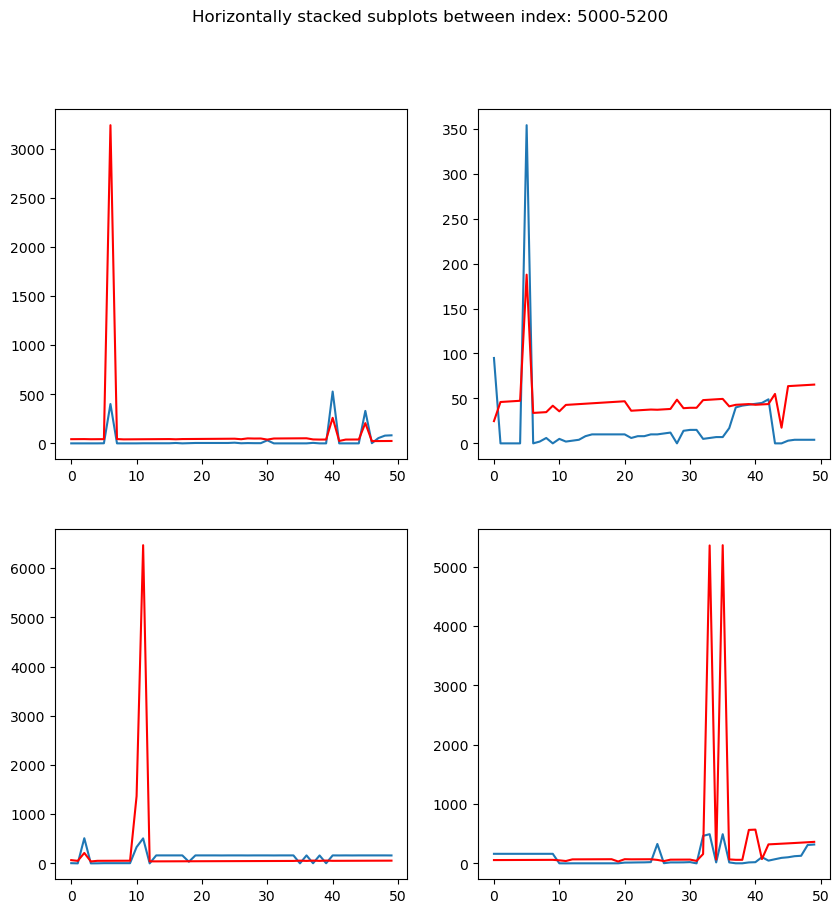

In [35]:
analyze_pred.plot_pred_vs_orig(5000,50,Y_waittimedata,y_pred25_sept.ravel())

In [37]:
from sklearn.metrics import r2_score
r2_score(Y_waittimedata.to_numpy(),y_pred25_sept)

-4.951902496903082